## Modelos baseados em árvores

Nesse notebook, você irá aprender como aplicar modelos baseados em árvores no case de análise de transações fraudulentas de cartões de crédito.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

In [2]:
#subindo a base de dados
dados = pd.read_csv("bases/card_transdata.csv", sep=",")

In [3]:
dados.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
dados.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [10]:
dados = dados.dropna()

<Axes: >

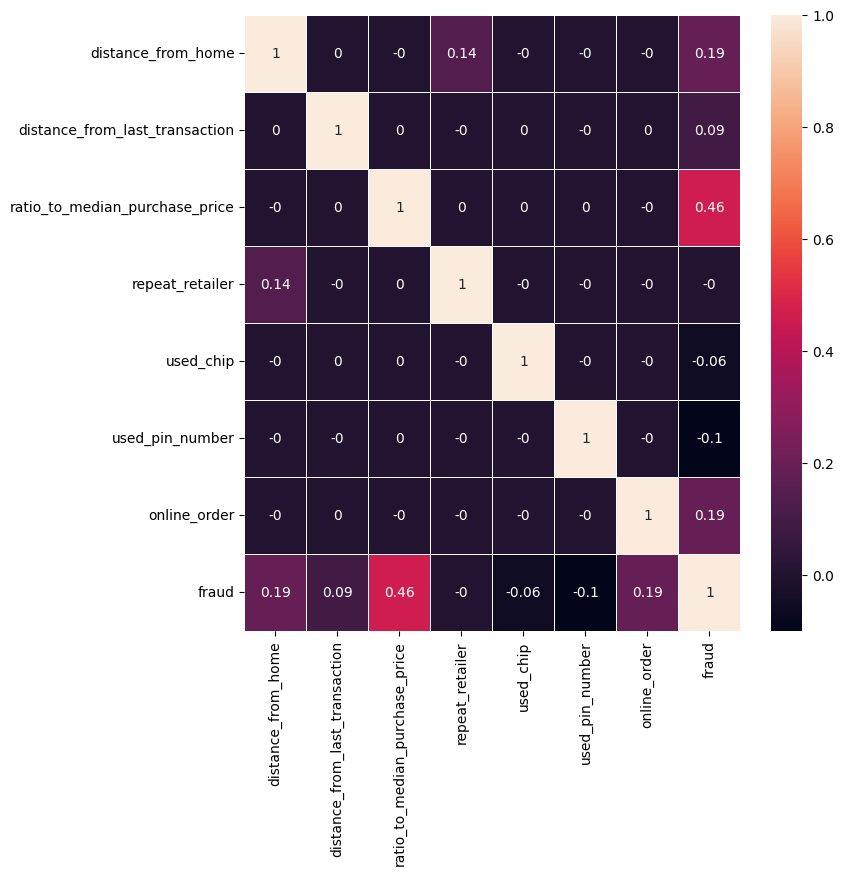

In [5]:
#analisando correlações
correlation_matrix = dados.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

In [6]:
dados.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [7]:
#Separando os dados
x = dados.drop(columns=['fraud'])
y = dados['fraud'] #O que eu quero prever. (Target)

In [8]:
#Separando em bases de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=7)

## Criando modelos de árvores:


### Decision Tree
Vamos criar um modelo simples, utilizando todas as variáveis do modelo.

In [12]:
dt = DecisionTreeClassifier(random_state=7, criterion='entropy', max_depth = 2)
# criterion -> metodo para analisar
# max_depth -> maximo de ramificações

In [14]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=7)

In [15]:
y_predito = dt.predict(x_test)

[Text(0.5, 0.8333333333333334, 'x[2] <= 4.0\nentropy = 0.426\nsamples = 142958\nvalue = [130544, 12414]'),
 Text(0.25, 0.5, 'x[0] <= 100.015\nentropy = 0.171\nsamples = 128404\nvalue = [125141, 3263]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.052\nsamples = 121932\nvalue = [121217, 715]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.967\nsamples = 6472\nvalue = [3924, 2548]'),
 Text(0.75, 0.5, 'x[6] <= 0.5\nentropy = 0.952\nsamples = 14554\nvalue = [5403, 9151]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.522\nsamples = 5068\nvalue = [4473, 595]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.463\nsamples = 9486\nvalue = [930, 8556]')]

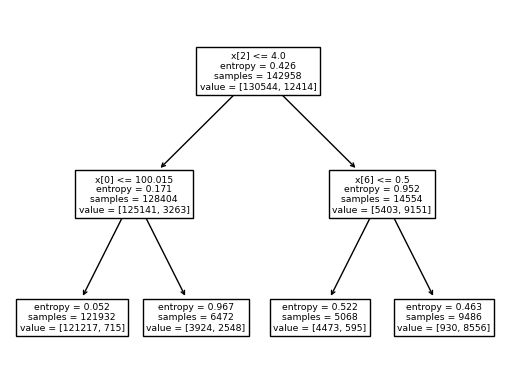

In [17]:
tree.plot_tree(dt)

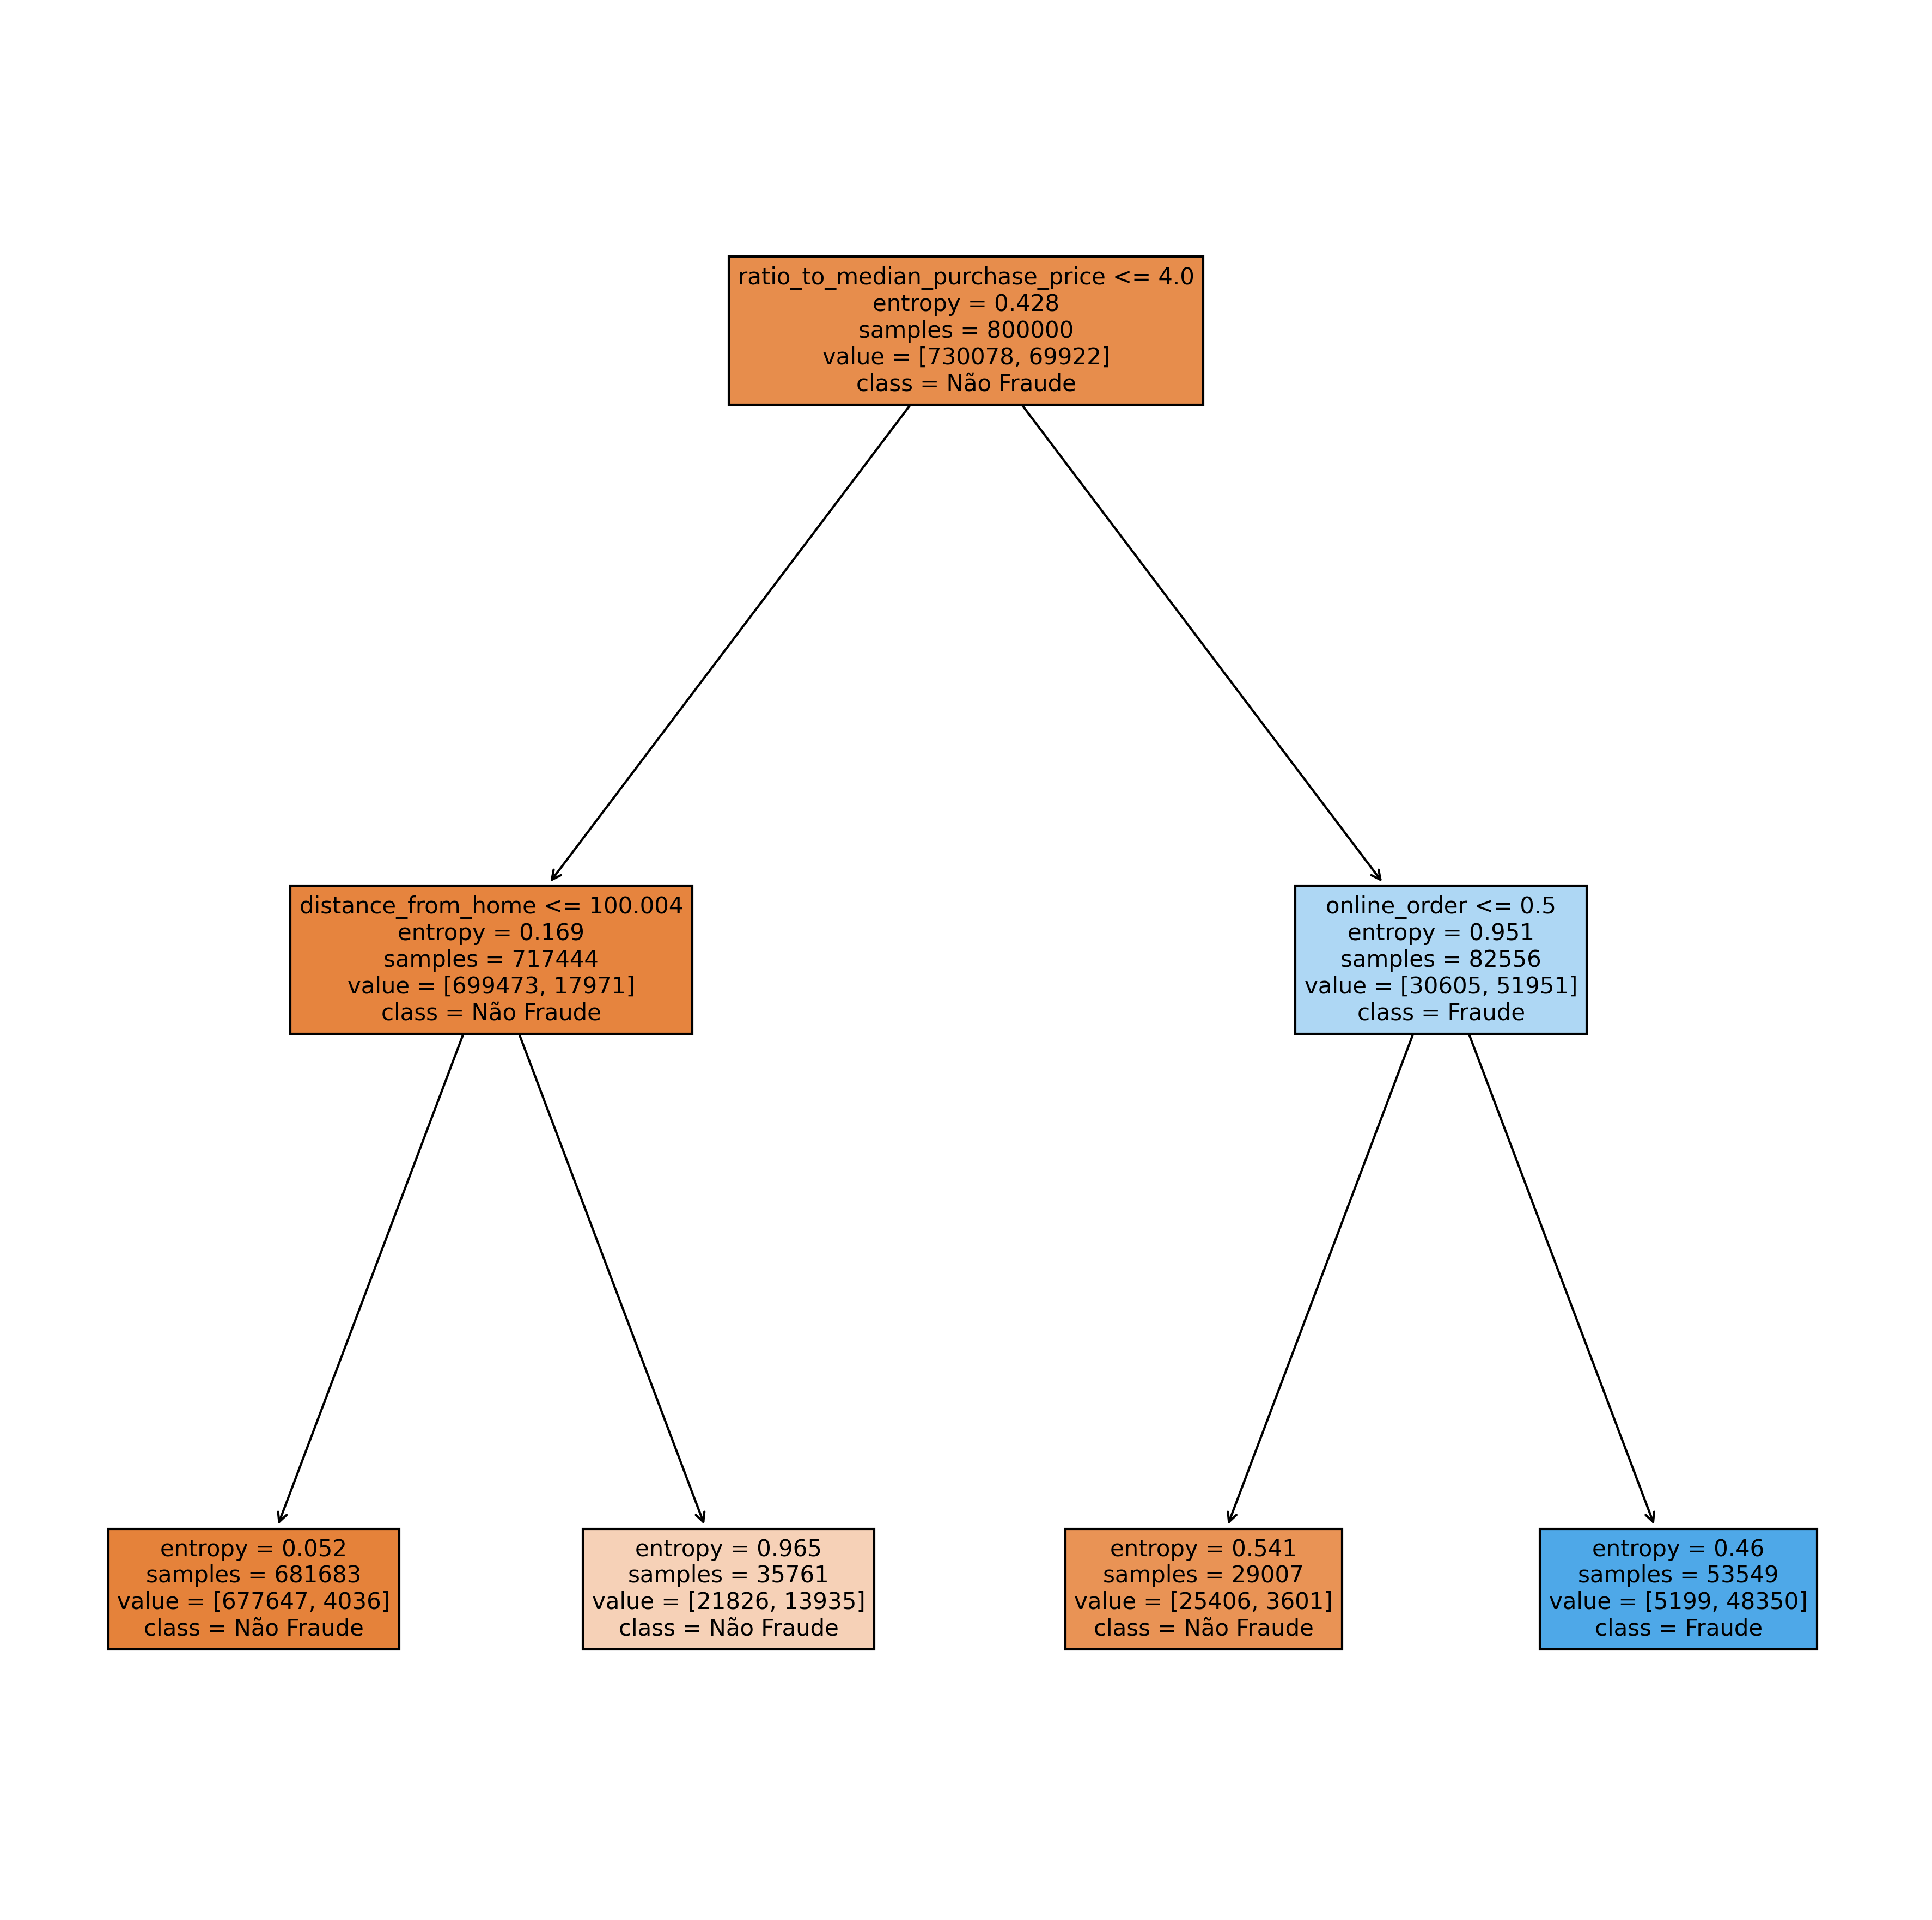

In [17]:
class_names = ['Não Fraude', 'Fraude']
label_names = ['distance_from_home', 'distance_from_last_transaction',	'ratio_to_median_purchase_price',	'repeat_retailer',	'used_chip',	'used_pin_number',	'online_order']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15), dpi=300)

tree.plot_tree(dt,
               feature_names = label_names,
               class_names=class_names,
               filled = True)

fig.savefig('imagename.png')

In [18]:
# Metricas de precisão, revocação, f1-score e acurácia.
print(accuracy_score(y_test, y_predito)) #relatório de validação das métrica de desempenho.

0.96675


### Random Forest

In [20]:
rf = RandomForestClassifier(n_estimators=5, max_depth = 2,  random_state=7)

rf.fit(x_train, y_train)



RandomForestClassifier(max_depth=2, n_estimators=5, random_state=7)

In [21]:
estimator = rf.estimators_

In [22]:
y_predito_random_forest = rf.predict(x_test)

In [23]:
# Metricas de precisão, revocação, f1-score e acurácia.
print(accuracy_score(y_test, y_predito_random_forest)) #relatório de validação das métrica de desempenho.

0.953217683268047


In [24]:
class_names = ['Não Fraude', 'Fraude']
label_names = ['distance_from_home', 'distance_from_last_transaction',	'ratio_to_median_purchase_price',	'repeat_retailer',	'used_chip',	'used_pin_number',	'online_order']


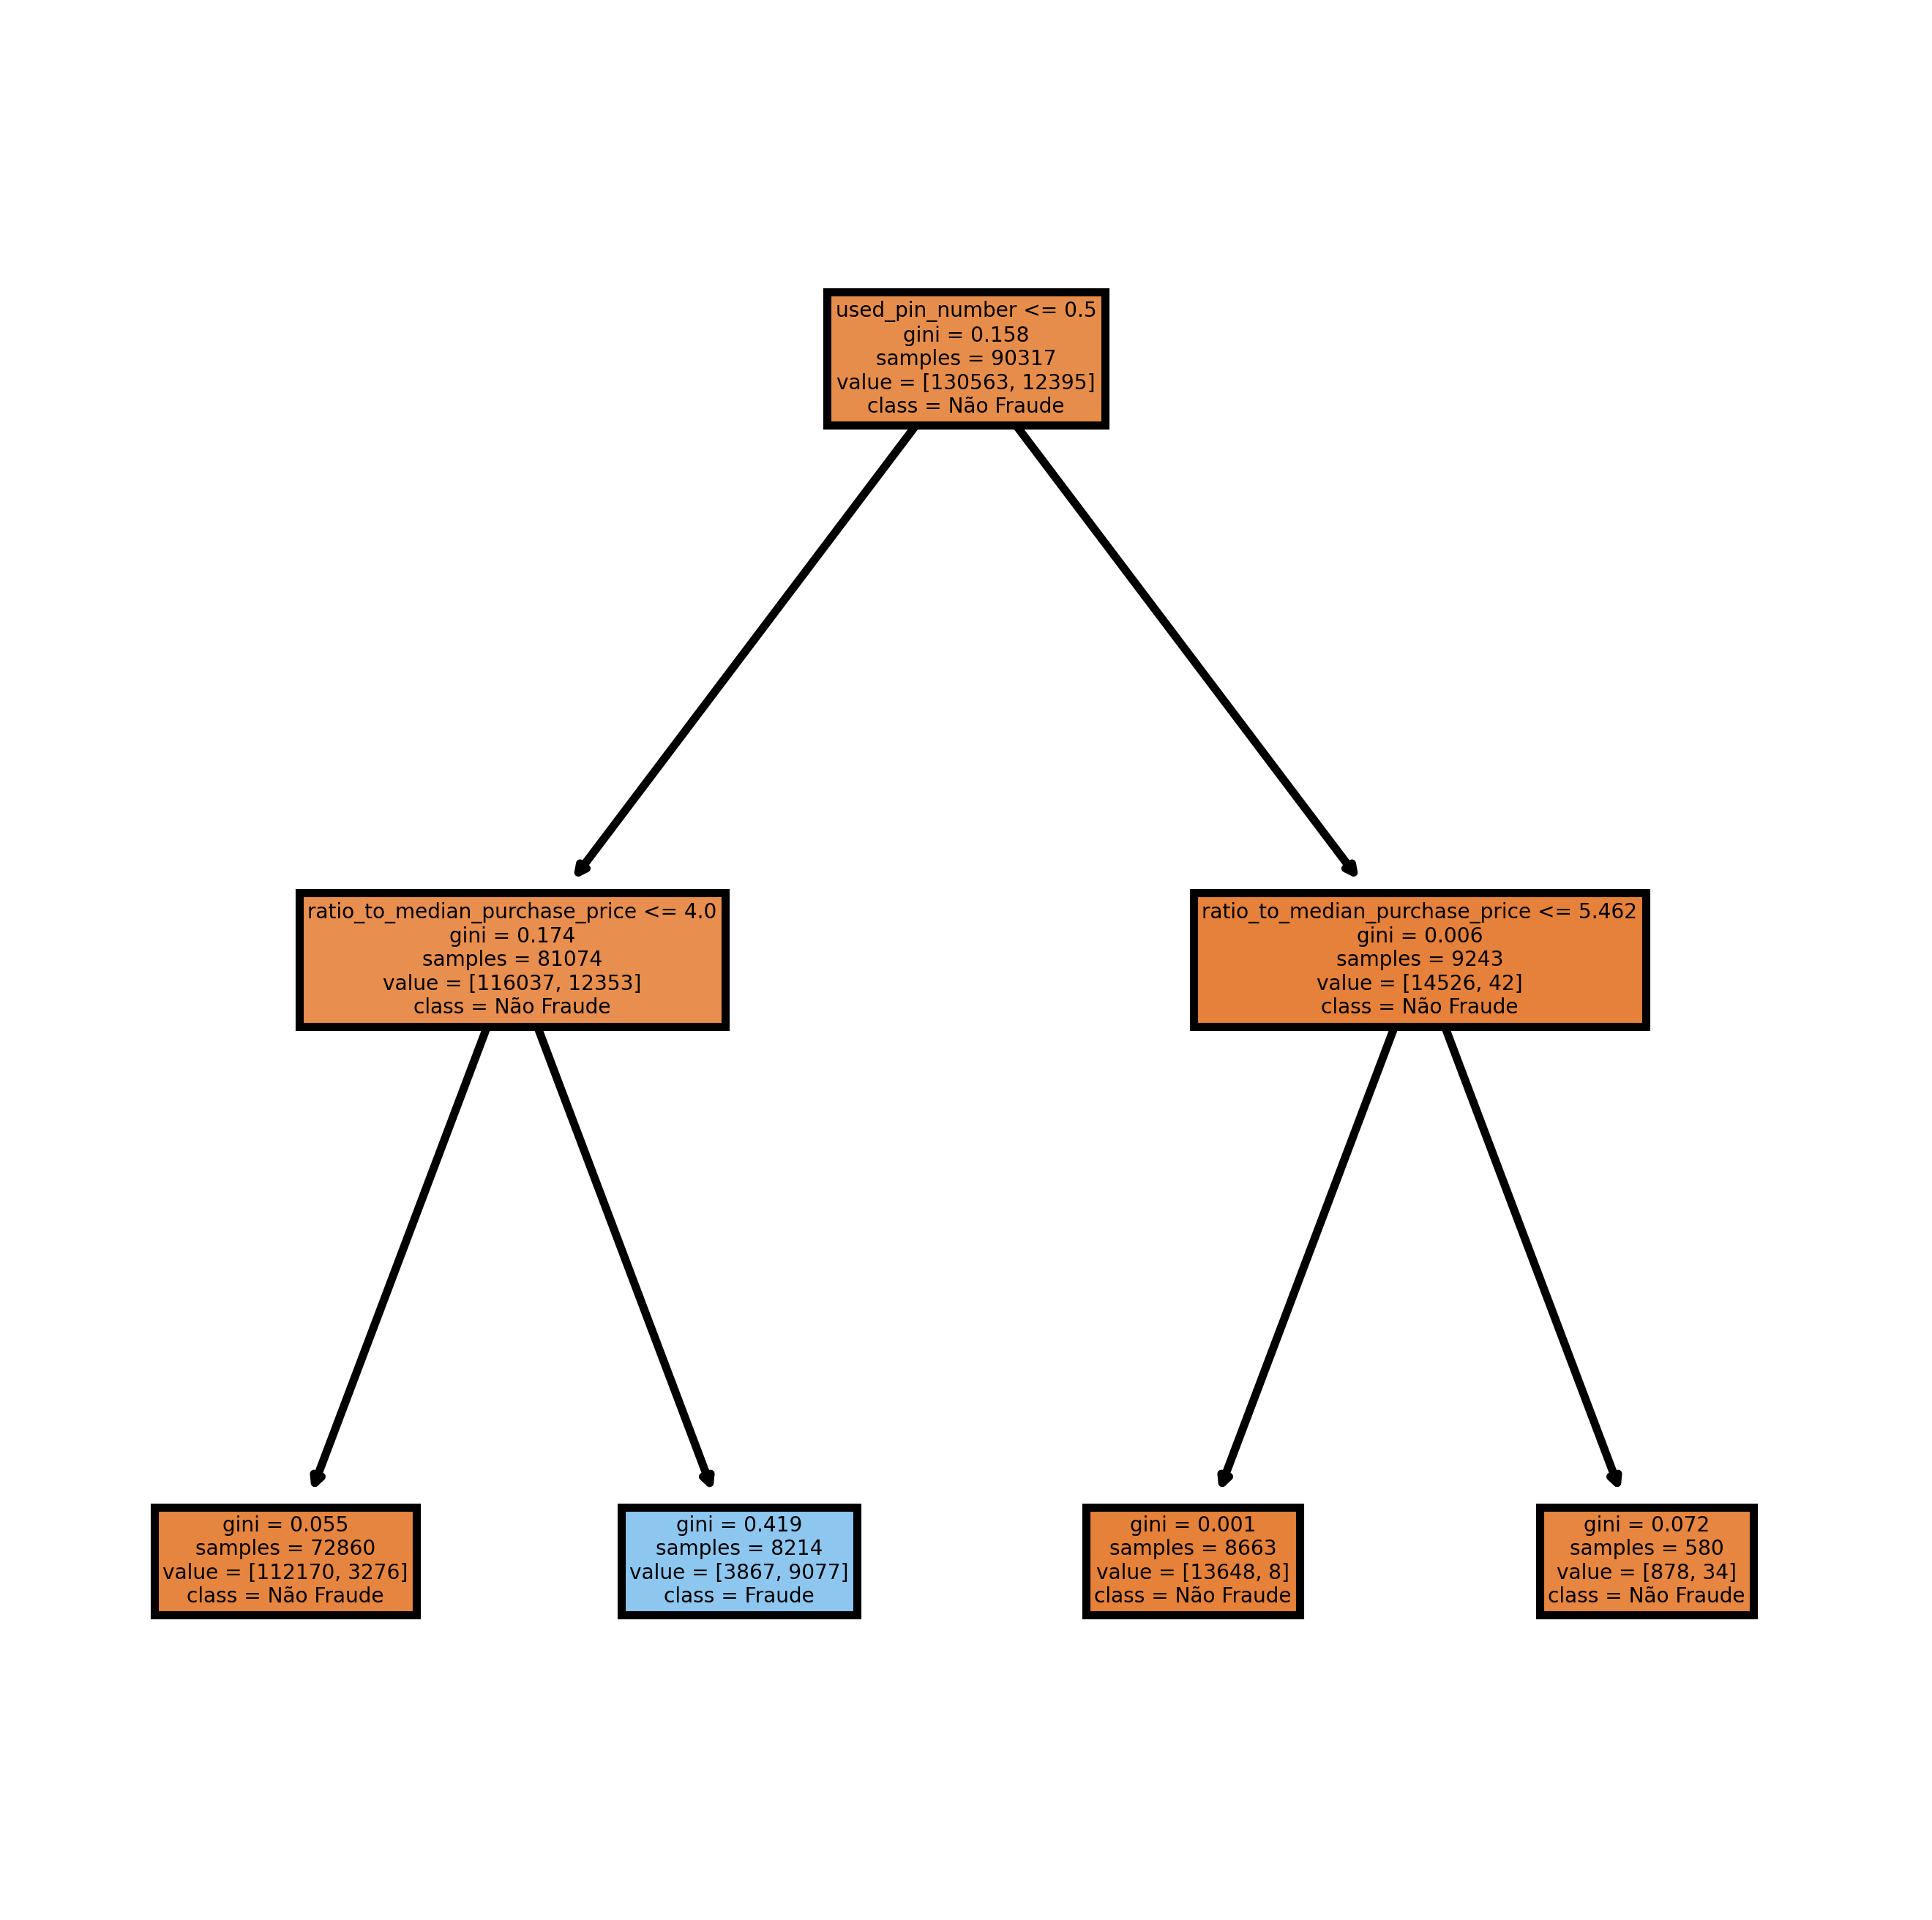

In [25]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = label_names,
               class_names=class_names,
               filled = True);
fig.savefig('rf_individualtree.png')

Plotando todas as árvores geradas:

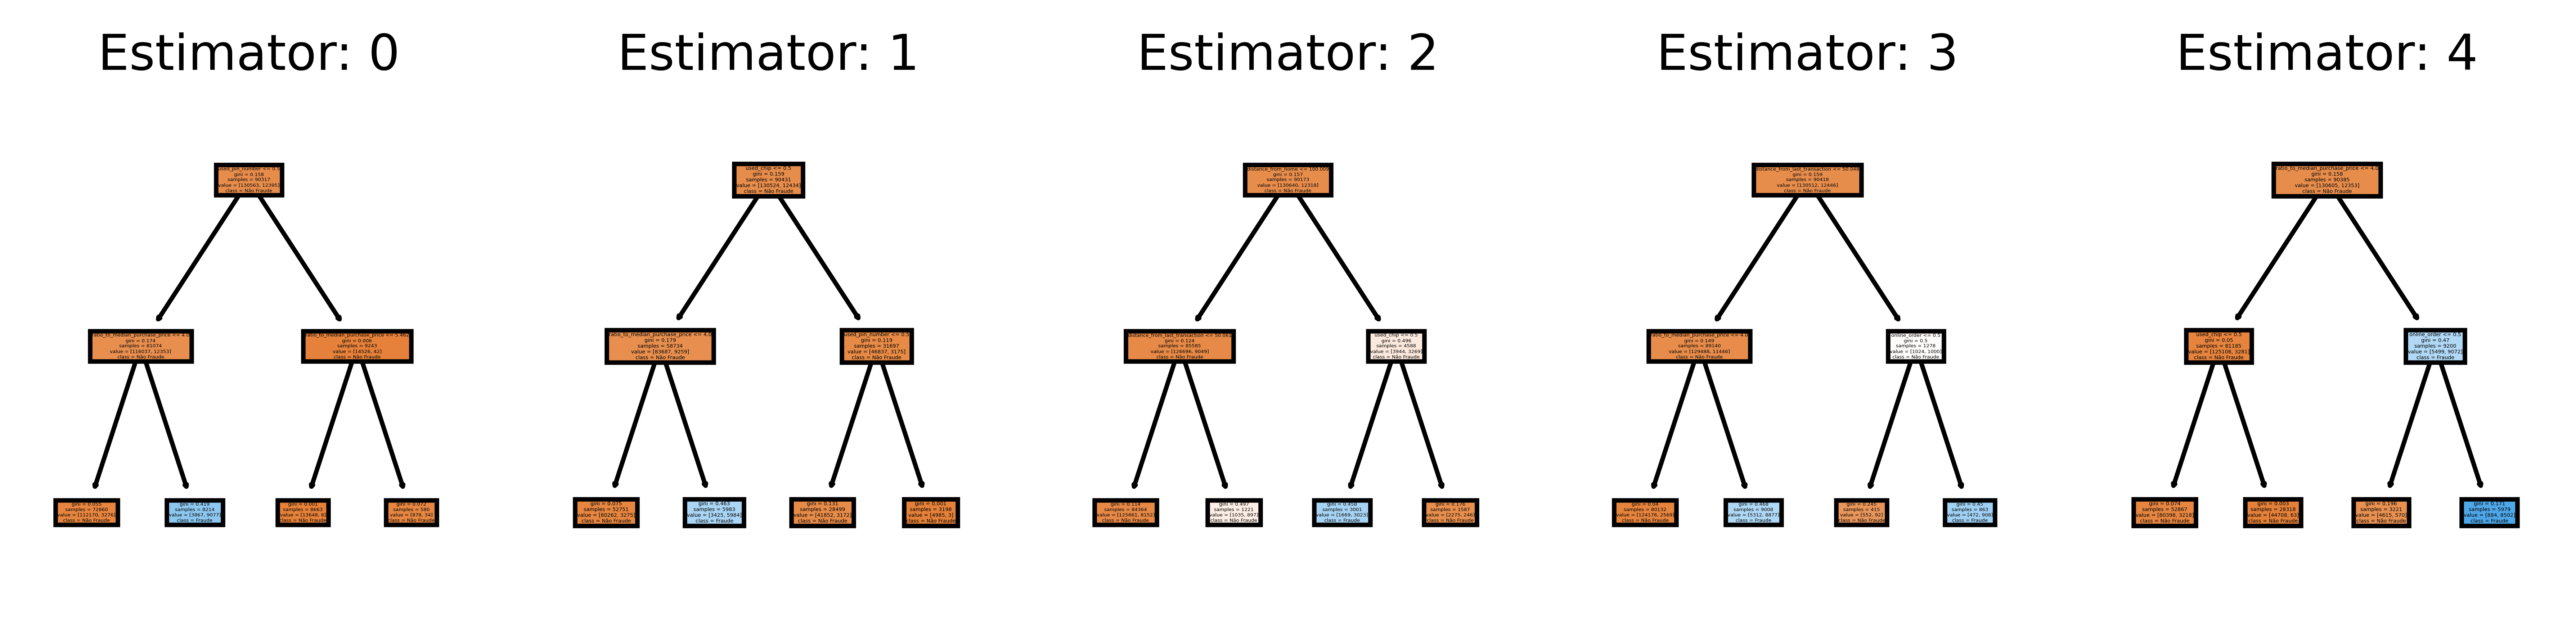

In [26]:
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(rf.estimators_[index],
                   feature_names = label_names,
                   class_names=class_names,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')

In [27]:
print (rf.score(x_train, y_train))
print(rf.score(x_test, y_test))

0.953405895437821
0.953217683268047


O **score** nos dá uma visão da precisão média da floresta aleatória nos dados fornecidos